## Compression techniques to help our model fitting experience
### Make it more accurate, lower memory, faster etc. Examples include: 

Topics: Artificial Inteligence/ Generative AI

1) Principal Component Analysis (PCA) -uses Singular Value Decomposition of the data to project it to a lower dimensional space

2) Variaional Autoencoders (VAE)-ability to reduce the dimenionality of the data and retaining important information
The above benefits from filtering noise, view fewer dimensional space, less memory requirements and avoiding collinearity
Usually VAE are used for Image processing and creating (like GANS Models).  Example of usage:image synthesis, data denoising, and anomaly detection, ma and more explained in the Refs.

### References:

https://www.kaggle.com/code/schmiddey/variational-autoencoder-with-pytorch-vs-pca
https://www.kaggle.com/code/mitishaagarwal/dimensionality-reduction-vae-int
https://neptune.ai/blog/plotly-python-tutorial-for-machine-learning-specialists

https://www.datacamp.com/tutorial/variational-autoencoders

Importing Libraries

In [1]:
# Load the wine dataset
# and train a decision tree classifier
# using the sklearn library
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import torch 
import torch.nn as nn 
import torch.optim as optim 
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import datasets, transforms 
from torch.utils.data import DataLoader 

import matplotlib.pyplot as plt  

In [2]:
# Load the wine dataset from sklearn
df = load_wine()
# Create a pandas DataFrame from the dataset
df = pd.DataFrame(data=df.data, columns=df.feature_names)
df.head(5)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
#Add the labels to df as a first col using the insert method
df.insert(0, 'Wine', load_wine().target)
df.head(5)

,Wine,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Scale the data

In [4]:
# Remove and clean NaN values from the wine dataframe
df = df.dropna()
df_base = df.iloc[:, 1:]

# get wine Label
df_wine = df.iloc[:,0].values
x = df_base.values.reshape(-1, df_base.shape[1]).astype('float32')
# Perform a standard transformation on the data
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(x)
X

array([[ 1.5186119 , -0.5622497 ,  0.2320528 , ...,  0.3621771 ,
         1.8479197 ,  1.013009  ],
       [ 0.24628939, -0.49941337, -0.82799596, ...,  0.40605047,
         1.1134495 ,  0.96524155],
       [ 0.19687884,  0.02123115,  1.1093346 , ...,  0.31830376,
         0.78858757,  1.3951482 ],
       ...,
       [ 0.33275872,  1.7447447 , -0.38935545, ..., -1.6121253 ,
        -1.4854455 ,  0.28057536],
       [ 0.20923176,  0.22769368,  0.01273167, ..., -1.5682516 ,
        -1.4006989 ,  0.29649785],
       [ 1.3950862 ,  1.583165  ,  1.3652083 , ..., -1.5243783 ,
        -1.4289477 , -0.5951604 ]], shape=(178, 13), dtype=float32)

Inspect data

The following plot shows how the variables in this dataset are correlated with at least one other variable. 

Create a plot of the data using all features to show -ve and +ve correlations between them

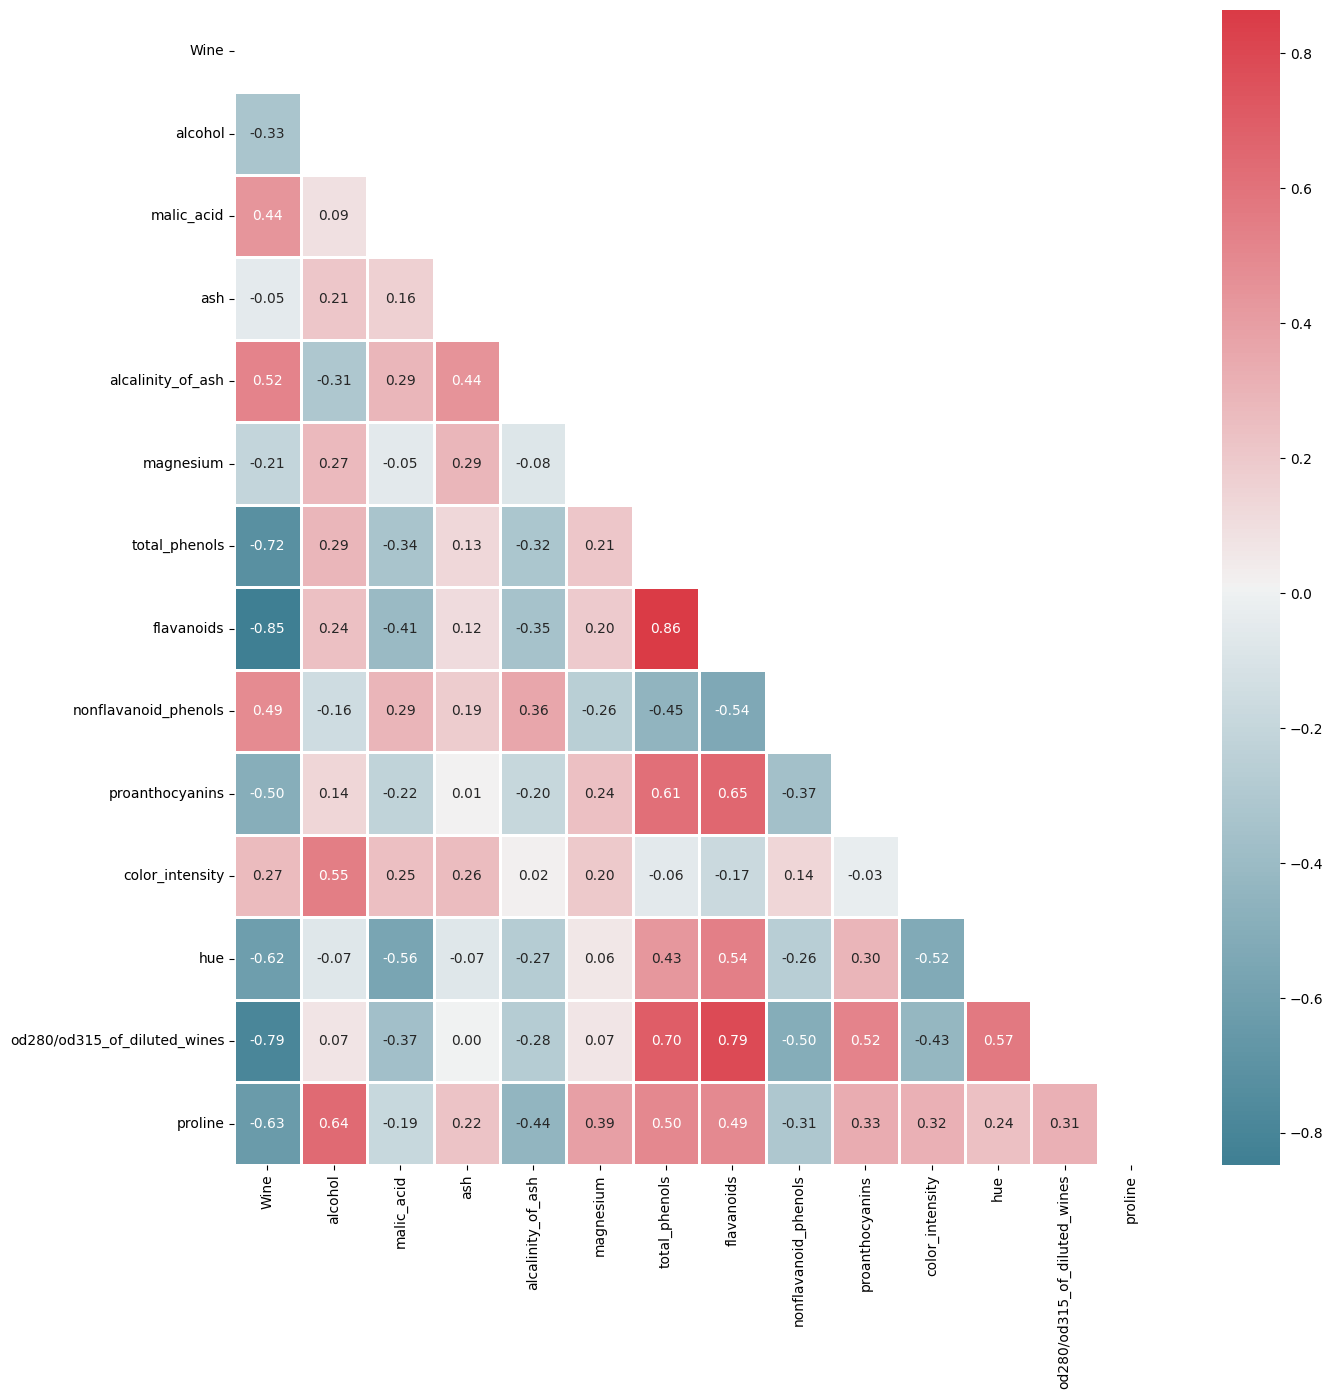

In [5]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)

def corr_heatmap(df):
  # get correlations
  corrs = df.corr()

  # pick appropriate palette for heatmap

  # Plot figsize
  fig, ax = plt.subplots(figsize=(15, 15))

  # to mask mirrored side of heatmap
  dropSelf = np.zeros_like(corrs)
  dropSelf[np.triu_indices_from(dropSelf)] = True

  # Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
  ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

  plt.show()

corr_heatmap(df)

In [6]:
# Check the device hardware
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [7]:
# convert the numpy array to a tensor
def numpyToTensor(x):
    x_train = torch.from_numpy(x).to(device)
    return x_train

In [8]:
df.columns

Index(['Wine', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [9]:
def rescale(path):
    
    df_base = df.iloc[:, 1:]
    # get wine Label
    df_wine = df.iloc[:,0].values
    x = df_base.values.reshape(-1, df_base.shape[1]).astype('float32')
    # stadardize values
    standardizer = preprocessing.StandardScaler()
    x = standardizer.fit_transform(x)    
    return x, standardizer, df_wine

In [10]:
def numpyToTensor(x):
    x_train = torch.from_numpy(x).to(device)
    return x_train

### Principal Component Analysis
Eigen vector/Eigen values
Dimensional reduction
Create the PCA with 3 dimensions 

In [11]:
x_pca, standardizer, df_wine = rescale(df)
x_pca.shape

(178, 13)

In [12]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x_pca)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [13]:
finalDf = pd.concat([principalDf, pd.DataFrame(df_wine, columns = ['wine'])], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,wine
0,3.316751,1.443463,-0.165738,0
1,2.209465,-0.333393,-2.026457,0
2,2.516740,1.031151,0.982819,0
3,3.757066,2.756372,-0.176192,0
4,1.008909,0.869831,2.026688,0


Define the  Pytorch Autoencoder

In [14]:
from torch.utils.data import Dataset, DataLoader
class DataBuilder(Dataset):
    def __init__(self, path):
        self.x, self.standardizer, self.wine =rescale(df)
        # convert to tensor
        self.x = numpyToTensor(self.x)
        self.len=self.x.shape[0]
    def __getitem__(self,index):      
        return self.x[index]
    def __len__(self):
        return self.len

In [15]:
data_set = DataBuilder(df)
trainloader=DataLoader(dataset=data_set,batch_size=1024)

In [16]:
type(trainloader.dataset.x)

torch.Tensor

In [17]:
data_set.x

tensor([[ 1.5186, -0.5622,  0.2321,  ...,  0.3622,  1.8479,  1.0130],
        [ 0.2463, -0.4994, -0.8280,  ...,  0.4061,  1.1134,  0.9652],
        [ 0.1969,  0.0212,  1.1093,  ...,  0.3183,  0.7886,  1.3951],
        ...,
        [ 0.3328,  1.7447, -0.3894,  ..., -1.6121, -1.4854,  0.2806],
        [ 0.2092,  0.2277,  0.0127,  ..., -1.5683, -1.4007,  0.2965],
        [ 1.3951,  1.5832,  1.3652,  ..., -1.5244, -1.4289, -0.5952]])

## VAE analysis

A Variational Autoencoder (VAE) is a type of generative model in machine learning that is used to learn a compressed representation of data while also being able to generate new, synthetic data points. VAE is a type of neural network for dimensionality reduction or feature learningin which :

1. The encoder: Compresses the input data into a lower-dimensional latent space.
2. The decoder: Reconstructs the original data from this compressed representation.

Build the Model, train it and compare with PCA

In [18]:
class Autoencoder(nn.Module):
    def __init__(self,D_in,H=50,H2=12,latent_dim=3):
        
        #Encoder
        super(Autoencoder,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.lin_bn1 = nn.BatchNorm1d(num_features=H)
        self.linear2=nn.Linear(H,H2)
        self.lin_bn2 = nn.BatchNorm1d(num_features=H2)
        self.linear3=nn.Linear(H2,H2)
        self.lin_bn3 = nn.BatchNorm1d(num_features=H2)
        
        # Latent vectors mu and sigma
        self.fc1 = nn.Linear(H2, latent_dim)
        self.bn1 = nn.BatchNorm1d(num_features=latent_dim)
        self.fc21 = nn.Linear(latent_dim, latent_dim)
        self.fc22 = nn.Linear(latent_dim, latent_dim)

        # Sampling vector
        self.fc3 = nn.Linear(latent_dim, latent_dim)
        self.fc_bn3 = nn.BatchNorm1d(latent_dim)
        self.fc4 = nn.Linear(latent_dim, H2)
        self.fc_bn4 = nn.BatchNorm1d(H2)
        
        # Decoder
        self.linear4=nn.Linear(H2,H2)
        self.lin_bn4 = nn.BatchNorm1d(num_features=H2)
        self.linear5=nn.Linear(H2,H)
        self.lin_bn5 = nn.BatchNorm1d(num_features=H)
        self.linear6=nn.Linear(H,D_in)
        self.lin_bn6 = nn.BatchNorm1d(num_features=D_in)
        
        self.relu = nn.ReLU()
        
    def encode(self, x):
        lin1 = self.relu(self.lin_bn1(self.linear1(x)))
        lin2 = self.relu(self.lin_bn2(self.linear2(lin1)))
        lin3 = self.relu(self.lin_bn3(self.linear3(lin2)))

        fc1 = F.relu(self.bn1(self.fc1(lin3)))

        r1 = self.fc21(fc1)
        r2 = self.fc22(fc1)
        
        return r1, r2
    
    def reparameterize(self, mu, logvar):
        if self.training:
            std = logvar.mul(0.5).exp_()
            eps = Variable(std.data.new(std.size()).normal_())
            return eps.mul(std).add_(mu)
        else:
            return mu
        
    def decode(self, z):
        fc3 = self.relu(self.fc_bn3(self.fc3(z)))
        fc4 = self.relu(self.fc_bn4(self.fc4(fc3)))

        lin4 = self.relu(self.lin_bn4(self.linear4(fc4)))
        lin5 = self.relu(self.lin_bn5(self.linear5(lin4)))
        return self.lin_bn6(self.linear6(lin5))


    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        # self.decode(z) ist später recon_batch, mu ist mu und logvar ist logvar
        return self.decode(z), mu, logvar

In [19]:
class customLoss(nn.Module):
    def __init__(self):
        super(customLoss, self).__init__()
        self.mse_loss = nn.MSELoss(reduction="sum")
    
    # x_recon ist der im forward im Model erstellte recon_batch, x ist der originale x Batch, mu ist mu und logvar ist logvar 
    def forward(self, x_recon, x, mu, logvar):
        loss_MSE = self.mse_loss(x_recon, x)
        loss_KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

        return loss_MSE + loss_KLD

In [20]:
# takes in a module and applies the specified weight initialization
def weights_init_uniform_rule(m):
    classname = m.__class__.__name__
    # for every Linear layer in a model..
    if classname.find('Linear') != -1:
        # get the number of the inputs
        n = m.in_features
        y = 1.0/np.sqrt(n)
        m.weight.data.uniform_(-y, y)
        m.bias.data.fill_(0)

In [21]:
D_in = data_set.x.shape[1]
H = 50
H2 = 12
model = Autoencoder(D_in, H, H2).to(device)
model.apply(weights_init_uniform_rule)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [22]:
loss_mse = customLoss()

Training the Model

In [23]:
epochs = 1200
log_interval = 50
val_losses = []
train_losses = []

In [24]:
def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, data in enumerate(trainloader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_mse(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        #if batch_idx % log_interval == 0:
        #    print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        #        epoch, batch_idx * len(data), len(trainloader.dataset),
        #               100. * batch_idx / len(trainloader),
        #               loss.item() / len(data)))
    if epoch % 200 == 0:        
        print('====> Epoch: {} Average loss: {:.4f}'.format(
            epoch, train_loss / len(trainloader.dataset)))
        train_losses.append(train_loss / len(trainloader.dataset))

In [25]:
for epoch in range(1, epochs + 1):
    train(epoch)

====> Epoch: 200 Average loss: 13.2590
====> Epoch: 400 Average loss: 9.8691
====> Epoch: 600 Average loss: 9.1711
====> Epoch: 800 Average loss: 8.8064
====> Epoch: 1000 Average loss: 8.7280
====> Epoch: 1200 Average loss: 8.6663


In [26]:
# Evaluate the model
standardizer = trainloader.dataset.standardizer
model.eval()
test_loss = 0
# no_grad() bedeutet wir nehmen die vorher berechneten Gewichte und erneuern sie nicht
with torch.no_grad():
    for i, data in enumerate(trainloader):
        data = data.to(device)
        recon_batch, mu, logvar = model(data)


In [27]:
mu_output = []
logvar_output = []

with torch.no_grad():
    for i, (data) in enumerate(trainloader):
            data = data.to(device)
            optimizer.zero_grad()
            recon_batch, mu, logvar = model(data)

            
            mu_tensor = mu   
            mu_output.append(mu_tensor)
            mu_result = torch.cat(mu_output, dim=0)

            logvar_tensor = logvar   
            logvar_output.append(logvar_tensor)
            logvar_result = torch.cat(logvar_output, dim=0)

In [28]:
mu_result.shape

torch.Size([178, 3])

In [29]:
mu_result[1:5,:]

tensor([[-0.6452,  0.5981,  0.8331],
        [-0.9249,  0.6170,  1.2234],
        [-1.0133,  0.6206,  1.3481],
        [-1.3899,  0.6249,  1.8681]])

These are the embeddings calculated by our VAE.


Plot Embeddings of PCA

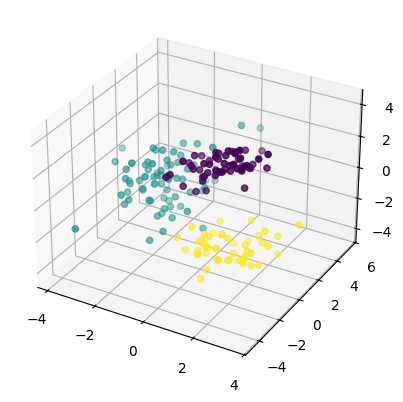

In [30]:
ax = plt.axes(projection='3d')


# Data for three-dimensional scattered points
winetype = finalDf.iloc[:,3].values
zdata = finalDf.iloc[:,0].values
xdata = finalDf.iloc[:,1].values
ydata = finalDf.iloc[:,2].values
ax.scatter3D(xdata, ydata, zdata, c=winetype);

Plot Embeddings from VAE

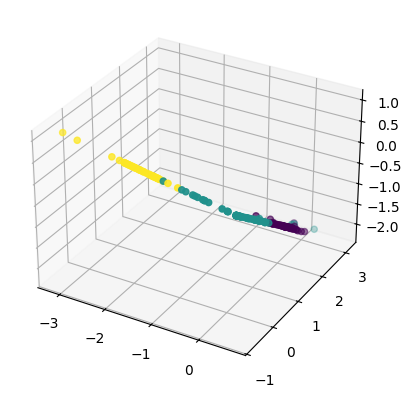

In [31]:
ax = plt.axes(projection='3d')


# Data for three-dimensional scattered points
winetype = data_set.wine
zdata = mu_result[:,0].cpu().numpy()
xdata = mu_result[:,1].cpu().numpy()
ydata = mu_result[:,2].cpu().numpy()
ax.scatter3D(xdata, ydata, zdata, c=winetype);